In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding = "ISO-8859-1")

In [3]:
df["v1"].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [4]:
df["spam"] = df["v1"].apply(lambda x: 1 if x =="spam" else 0)

In [5]:
df = df.loc[:, df.columns.isin(["v1", "v2", "spam"])]

In [6]:
df.head()

,v1,v2,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df["v2"],df["spam"],test_size=0.2,random_state=5)

In [8]:
X_train.shape

(4457,)

In [9]:
X_test.shape

(1115,)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<4457x7823 sparse matrix of type '<class 'numpy.int64'>'
	with 59528 stored elements in Compressed Sparse Row format>

In [11]:
X_train_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [12]:
X_train_cv.shape

(4457, 7823)

In [13]:
v.get_feature_names_out()[1040:1204]

array(['apo', 'apologise', 'apologize', 'app', 'apparently', 'appeal',
       'appear', 'appendix', 'applausestore', 'applebees', 'apples',
       'application', 'apply', 'applyed', 'appointment', 'appointments',
       'appreciate', 'appreciated', 'approaches', 'approaching',
       'appropriate', 'approve', 'approved', 'approx', 'apps', 'appt',
       'april', 'aproach', 'aptitude', 'aquarius', 'ar', 'arab',
       'arabian', 'arcade', 'ard', 'are', 'area', 'aren', 'arent',
       'arestaurant', 'aretaking', 'areyouunique', 'argh', 'argue',
       'argument', 'arguments', 'aries', 'arise', 'arises', 'arm',
       'armand', 'armenia', 'arms', 'arng', 'arngd', 'around', 'aroundn',
       'arr', 'arrange', 'arranging', 'arrested', 'arrive', 'arrow',
       'arsenal', 'art', 'artists', 'arts', 'arty', 'arul', 'arun', 'as',
       'asa', 'asap', 'ashley', 'ashwini', 'asian', 'asjesus', 'ask',
       'askd', 'asked', 'askin', 'asking', 'asks', 'aslamalaikkum',
       'asleep', 'asp', 'aspe

In [14]:
v.vocabulary_

{'rgent': 5830,
 'this': 6916,
 'is': 3777,
 'the': 6877,
 '2nd': 419,
 'attempt': 1151,
 'to': 6998,
 'contact': 2003,
 'have': 3383,
 'won': 7640,
 '1250': 299,
 'call': 1627,
 '09071512433': 255,
 'b4': 1200,
 '050703': 17,
 'csbcm4235wc1n3xx': 2115,
 'callcost': 1631,
 '150ppm': 323,
 'mobilesvary': 4574,
 'maxå': 4422,
 '50': 547,
 'when': 7546,
 'love': 4248,
 'someone': 6363,
 'dont': 2427,
 'make': 4348,
 'them': 6886,
 'as': 1110,
 'much': 4662,
 'do': 2391,
 'but': 1593,
 'so': 6344,
 'that': 6871,
 'they': 6901,
 'want': 7441,
 'be': 1291,
 'loved': 4249,
 'by': 1609,
 'anyone': 1024,
 'except': 2719,
 'you': 7772,
 'gud': 3289,
 'nit': 4821,
 'ok': 4953,
 'then': 6889,
 'come': 1930,
 'pick': 5239,
 'at': 1141,
 'engin': 2612,
 'ugh': 7184,
 'my': 4693,
 'leg': 4090,
 'hurts': 3589,
 'musta': 4687,
 'overdid': 5064,
 'it': 3788,
 'on': 4972,
 'mon': 4595,
 'don': 2423,
 'know': 3981,
 'week': 7502,
 'going': 3194,
 'tirunelvai': 6975,
 'da': 2161,
 'dunno': 2506,
 'until': 

In [15]:
X_train_np = X_train_cv.toarray()
X_train_np[:4]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
np.where(X_train_np[0]!=0)

(array([  17,  255,  299,  323,  419,  547, 1151, 1200, 1627, 1631, 2003,
        2115, 3383, 3777, 4422, 4574, 5830, 6877, 6916, 6998, 7640]),)

In [17]:
X_train_np[0][1151]

1

In [18]:
v.get_feature_names_out()[1151]

'attempt'

In [19]:
X_train[:4]

1658    RGENT! This is the 2nd attempt to contact U!U ...
1509    When u love someone Dont make them to love u a...
3266                    Ok then i come n pick u at engin?
5199           Ugh my leg hurts. Musta overdid it on mon.
Name: v2, dtype: object

# Modelling

In [20]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_cv, y_train)

MultinomialNB()

In [21]:
X_test_cv = v.transform(X_test)

In [22]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_cv)
# f1 score important due to imbalance dataset
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       978
           1       0.98      0.92      0.95       137

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [23]:
emails = [
    "Hello you want to hang out tonight baby, just like last night, i have offer for you",
    "20% discount on parking, exclusive offer only for you"
]

emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1])

## Pipeline

In [24]:
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("nb", MultinomialNB())
])

In [25]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [26]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       978
           1       0.98      0.92      0.95       137

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



# Stop Words

In [27]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [28]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("We just opened our wings, the flying part is coming soon")

for token in doc:
    if token.is_stop:
        print(token)

We
just
our
the
part
is


In [29]:
def preprocess(text):
    doc = nlp(text)
    
    no_stop_words = [token.text for token in doc if not token.is_stop and not token.is_punct]
    no_stop_words = " ".join(no_stop_words)
    return no_stop_words

In [30]:
preprocess("We just opened our wings, the flying part is coming soon")

'opened wings flying coming soon'

In [31]:
df = pd.read_json("/kaggle/input/department-of-justice-20092018-press-releases/combined.json",lines=True)

df.shape

(13087, 6)

In [32]:
df.head(5)

,id,title,contents,date,topics,components
0,None,Convicted Bomb Plotter Sentenced to 30 Years,"PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,...",2014-10-01T00:00:00-04:00,[],[National Security Division (NSD)]
1,12-919,$1 Million in Restitution Payments Announced t...,WASHINGTON – North Carolina’s Waccamaw River...,2012-07-25T00:00:00-04:00,[],[Environment and Natural Resources Division]
2,11-1002,$1 Million Settlement Reached for Natural Reso...,BOSTON– A $1-million settlement has been...,2011-08-03T00:00:00-04:00,[],[Environment and Natural Resources Division]
3,10-015,10 Las Vegas Men Indicted \r\nfor Falsifying V...,WASHINGTON—A federal grand jury in Las Vegas...,2010-01-08T00:00:00-05:00,[],[Environment and Natural Resources Division]
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division]


In [33]:
df = df[df["topics"].str.len() != 0]
df.head()

,id,title,contents,date,topics,components
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division]
7,14-1412,14 Indicted in Connection with New England Com...,A 131-count criminal indictment was unsealed t...,2014-12-17T00:00:00-05:00,[Consumer Protection],[Civil Division]
19,17-1419,2017 Southeast Regional Animal Cruelty Prosecu...,The United States Attorney’s Office for the Mi...,2017-12-14T00:00:00-05:00,[Environment],"[Environment and Natural Resources Division, U..."
22,15-1562,21st Century Oncology to Pay $19.75 Million to...,"21st Century Oncology LLC, has agreed to pay $...",2015-12-18T00:00:00-05:00,"[False Claims Act, Health Care Fraud]",[Civil Division]
23,17-1404,21st Century Oncology to Pay $26 Million to Se...,21st Century Oncology Inc. and certain of its ...,2017-12-12T00:00:00-05:00,"[Health Care Fraud, False Claims Act]","[Civil Division, USAO - Florida, Middle]"


In [34]:
df =df.head(100)
df.shape

(100, 6)

In [35]:
df["contents_new"] = df.contents.apply(preprocess)

In [36]:
df

,id,title,contents,date,topics,components,contents_new
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division],U.S. Department Justice U.S. Environmental Pro...
7,14-1412,14 Indicted in Connection with New England Com...,A 131-count criminal indictment was unsealed t...,2014-12-17T00:00:00-05:00,[Consumer Protection],[Civil Division],131 count criminal indictment unsealed today B...
19,17-1419,2017 Southeast Regional Animal Cruelty Prosecu...,The United States Attorney’s Office for the Mi...,2017-12-14T00:00:00-05:00,[Environment],"[Environment and Natural Resources Division, U...",United States Attorney Office Middle District ...
22,15-1562,21st Century Oncology to Pay $19.75 Million to...,"21st Century Oncology LLC, has agreed to pay $...",2015-12-18T00:00:00-05:00,"[False Claims Act, Health Care Fraud]",[Civil Division],21st Century Oncology LLC agreed pay $ 19.75 m...
23,17-1404,21st Century Oncology to Pay $26 Million to Se...,21st Century Oncology Inc. and certain of its ...,2017-12-12T00:00:00-05:00,"[Health Care Fraud, False Claims Act]","[Civil Division, USAO - Florida, Middle]",21st Century Oncology Inc. certain subsidiarie...
...,...,...,...,...,...,...,...
316,15-1359,Alaska Plastic Surgeon Convicted of Wire Fraud...,Doctor Hid Millions in Secret Accounts in Pana...,2015-11-04T00:00:00-05:00,[Tax],[Tax Division],Doctor Hid Millions Secret Accounts Panama Ala...
318,16-396,Alaska Plastic Surgeon Sentenced to Prison for...,Defendant Concealed Bank Accounts in Panama an...,2016-04-04T00:00:00-04:00,[Tax],[Tax Division],Defendant Concealed Bank Accounts Panama Costa...
321,17-736,Alaskan Commercial Fishing Couple Charged with...,An Alaskan couple was charged in federal court...,2017-07-26T00:00:00-04:00,[Tax],"[Tax Division, USAO - Alaska]",Alaskan couple charged federal court Juneau Al...
322,18-717,Alaskan Husband And Wife Plead Guilty To Willf...,A husband and wife pleaded guilty yesterday to...,2018-06-01T00:00:00-04:00,[Tax],[Tax Division],husband wife pleaded guilty yesterday counts w...


In [37]:
len(df.contents[4])

6286

In [38]:
len(df.contents_new[4])

4574

# # Bag Of Words n-grams

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}

In [40]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 9,
 'hathodawala': 2,
 'is': 4,
 'looking': 7,
 'for': 0,
 'job': 6,
 'thor hathodawala': 10,
 'hathodawala is': 3,
 'is looking': 5,
 'looking for': 8,
 'for job': 1}

In [41]:
v = CountVectorizer(ngram_range=(1,3))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 12,
 'hathodawala': 2,
 'is': 5,
 'looking': 9,
 'for': 0,
 'job': 8,
 'thor hathodawala': 13,
 'hathodawala is': 3,
 'is looking': 6,
 'looking for': 10,
 'for job': 1,
 'thor hathodawala is': 14,
 'hathodawala is looking': 4,
 'is looking for': 7,
 'looking for job': 11}

In [42]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [43]:
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [44]:
preprocess("Thor ate pizza")

'thor eat pizza'

In [45]:
preprocess("Loki is eating pizza")

'Loki eat pizza'

In [46]:
corpus_processed = [
    preprocess(text) for text in corpus
]
corpus_processed

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [47]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(corpus_processed)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [48]:
v.transform(["Thor eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]])

In [49]:
v.transform(["Hulk eat pizza"]).toarray()#oov problem

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]])

In [50]:
df = pd.read_json("/kaggle/input/news-category-dataset/News_Category_Dataset_v3.json", lines=True)

df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [51]:
df = df[["short_description", "category"]]

In [52]:
df["category"].value_counts()

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

In [53]:
min_samples = 9900 # we have these many SCIENCE articles and SCIENCE is our minority class


df_politics = df[df.category=="POLITICS"].sample(min_samples, random_state=2022)
df_wellness = df[df.category=="WELLNESS"].sample(min_samples, random_state=2022)
df_entartainment = df[df.category=="ENTERTAINMENT"].sample(min_samples, random_state=2022)
df_travel = df[df.category=="TRAVEL"].sample(min_samples, random_state=2022)

In [54]:
df_balanced = pd.concat([df_politics,df_wellness,df_entartainment,df_travel],axis=0)
df_balanced.category.value_counts()

POLITICS         9900
WELLNESS         9900
ENTERTAINMENT    9900
TRAVEL           9900
Name: category, dtype: int64

In [55]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_balanced["category"] = labelencoder.fit_transform(df_balanced["category"])

# Build a model with original text (no pre processing)

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.short_description, 
    df_balanced.category, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df_balanced.category
)

In [57]:
print(X_train.shape)
X_train.head()

(31680,)


146031    Punctual people leave room for error. One of t...
120991    Maybe it's their permissive attitude toward pu...
3358      The '90s can't come back fast enough for fans ...
14084     "They are spending too much time trying to pro...
127940    The World Bank, which for decades has been cri...
Name: short_description, dtype: object

In [58]:
y_train.value_counts()

3    7920
2    7920
0    7920
1    7920
Name: category, dtype: int64

## Attempt 1 : Use 1-gram which is nothing but a Bag Of Words (BOW) model

In [59]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71      1980
           1       0.85      0.69      0.76      1980
           2       0.80      0.79      0.80      1980
           3       0.71      0.88      0.79      1980

    accuracy                           0.77      7920
   macro avg       0.77      0.77      0.76      7920
weighted avg       0.77      0.77      0.76      7920



In [60]:
X_test[:5]

128588                                                     
129681                                                     
28322     Taylor Swift's little brother will be in the m...
156006    The stress and strain of constantly being conn...
102799    This is much better than a seat upgrade.  Last...
Name: short_description, dtype: object

In [61]:
y_pred[:5]

array([0, 0, 0, 3, 2])

In [62]:
y_test[:5]

128588    2
129681    2
28322     0
156006    3
102799    2
Name: category, dtype: int64

## Attempt 2 : Use 1-gram and bigrams

In [63]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_n_gram_1_2', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.57      0.65      1980
           1       0.87      0.62      0.72      1980
           2       0.75      0.79      0.77      1980
           3       0.63      0.93      0.75      1980

    accuracy                           0.73      7920
   macro avg       0.75      0.73      0.72      7920
weighted avg       0.75      0.73      0.72      7920



# Attempt 3 : Use 1-gram to trigrams

In [64]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_1_3_grams', CountVectorizer(ngram_range = (1, 3))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.52      0.61      1980
           1       0.87      0.58      0.70      1980
           2       0.72      0.78      0.75      1980
           3       0.60      0.93      0.73      1980

    accuracy                           0.70      7920
   macro avg       0.73      0.70      0.70      7920
weighted avg       0.73      0.70      0.70      7920



In [65]:
df_balanced['preprocessed_txt'] = df_balanced['short_description'].apply(preprocess)

In [66]:
df_balanced.head()


,short_description,category,preprocessed_txt
16014,"The president, it evidently needs to be said, ...",1,president evidently need say professional athlete
25545,People should not be reduced to pawns used by ...,1,People reduce pawn official hope garner politi...
51291,The Senate will meet this Wednesday to elect i...,1,Senate meet Wednesday elect leader
41123,"In a letter to Attorney General Jeff Sessions,...",1,letter Attorney General Jeff Sessions ask avai...
10450,"Well, that didn't seem to go as planned.",1,plan


# Build a model with pre processed text

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.preprocessed_txt, 
    df_balanced.category, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df_balanced.category
)

In [68]:
print(X_train.shape)
X_train.head()

(31680,)


146031    punctual people leave room error common charac...
120991    maybe permissive attitude public nudity maybe ...
3358                               90 come fast fan Twitter
14084     spend time try prove russian collusion Trump c...
127940    World Bank decade criticize overly focus const...
Name: preprocessed_txt, dtype: object

In [69]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
    ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.61      0.68      1980
           1       0.85      0.68      0.76      1980
           2       0.77      0.83      0.80      1980
           3       0.70      0.91      0.79      1980

    accuracy                           0.76      7920
   macro avg       0.77      0.76      0.76      7920
weighted avg       0.77      0.76      0.76      7920



If you compare above classification report for (1,2) gram with the one from unprocessed text, you will find some improvement in the model that uses preprocessed cleaned up text. Hence we can conclude that for this particular problem using preprocessing (removing stop words, lemmatization) is improving the performance of the model

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1216,  166,  249,  349],
       [ 247, 1351,  114,  268],
       [ 126,   42, 1642,  170],
       [  16,   29,  128, 1807]])

Text(95.72222222222221, 0.5, 'Truth')

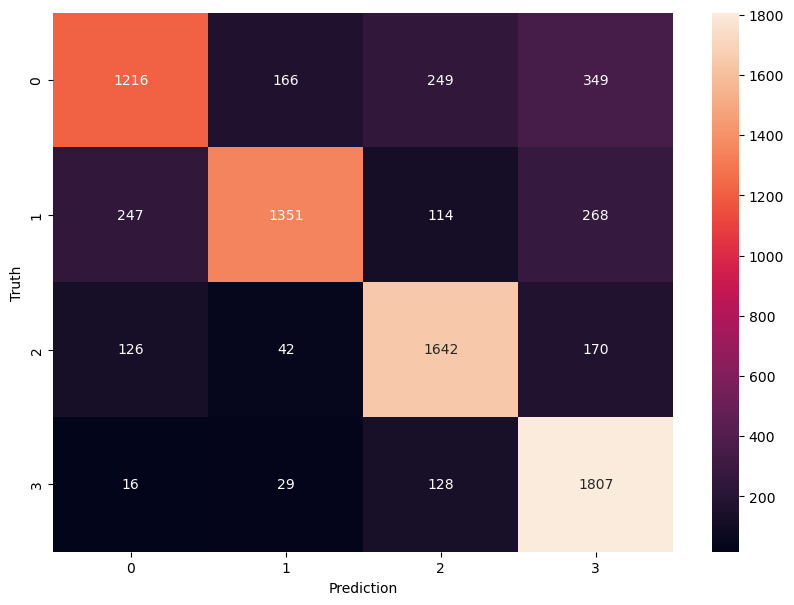

In [71]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

# TF-IDF

The formula for tf-idf (Term Frequency-Inverse Document Frequency) is:

tf-idf = tf * idf

where:

tf = (Number of times term appears in a document) / (Total number of terms in the document) <br/>
idf = log_e(Total number of documents / Number of documents with term in it)

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [73]:
#let's create the vectorizer and fit the corpus and transform them accordingly
v = TfidfVectorizer()
v.fit(corpus)
transform_output = v.transform(corpus)

In [74]:
#let's print the vocabulary

print(v.vocabulary_)

{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}


In [75]:
#let's print the idf of each word:

all_feature_names = v.get_feature_names_out()

for word in all_feature_names:
    
    #let's get the index in the vocabulary
    indx = v.vocabulary_.get(word)
    
    #get the score
    idf_score = v.idf_[indx]
    
    print(f"{word} : {idf_score}")

already : 2.386294361119891
am : 2.386294361119891
amazon : 2.386294361119891
and : 2.386294361119891
announcing : 1.2876820724517808
apple : 2.386294361119891
are : 2.386294361119891
ate : 2.386294361119891
biryani : 2.386294361119891
dot : 2.386294361119891
eating : 1.9808292530117262
eco : 2.386294361119891
google : 2.386294361119891
grapes : 2.386294361119891
iphone : 2.386294361119891
ironman : 2.386294361119891
is : 1.1335313926245225
loki : 2.386294361119891
microsoft : 2.386294361119891
model : 2.386294361119891
new : 1.2876820724517808
pixel : 2.386294361119891
pizza : 2.386294361119891
surface : 2.386294361119891
tesla : 2.386294361119891
thor : 2.386294361119891
tomorrow : 1.2876820724517808
you : 2.386294361119891


In [76]:
#let's print the transformed output from tf-idf
print(transform_output.toarray())

[[0.24266547 0.         0.         0.         0.         0.
  0.         0.24266547 0.         0.         0.40286636 0.
  0.         0.         0.         0.24266547 0.11527033 0.24266547
  0.         0.         0.         0.         0.72799642 0.
  0.         0.24266547 0.         0.        ]
 [0.         0.         0.         0.         0.30652086 0.5680354
  0.         0.         0.         0.         0.         0.
  0.         0.         0.5680354  0.         0.26982671 0.
  0.         0.         0.30652086 0.         0.         0.
  0.         0.         0.30652086 0.        ]
 [0.         0.         0.         0.         0.30652086 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.26982671 0.
  0.         0.5680354  0.30652086 0.         0.         0.
  0.5680354  0.         0.30652086 0.        ]
 [0.         0.         0.         0.         0.30652086 0.
  0.         0.         0.         0.         0.         0.
  0.

In [77]:
import pandas as pd

#read the data into a pandas dataframe
df = pd.read_csv("/kaggle/input/ecommerce-text-classification/ecommerceDataset.csv")
print(df.shape)
df.head(5)

(50424, 2)


,Household,"Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room."
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [78]:
df = df.rename(columns={"Household": "label"})
df = df.rename(columns={f"{df.columns.values[1]}": "Text"})

In [79]:
df.columns

Index(['label', 'Text'], dtype='object')

In [80]:
#check the distribution of labels 
df['label'].value_counts()

Household                 19312
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: label, dtype: int64

In [81]:
#Add the new column which gives a unique number to each of these labels 

df['label_num'] = df['label'].map({
    'Household' : 0, 
    'Books': 1, 
    'Electronics': 2, 
    'Clothing & Accessories': 3
})

#checking the results 
df.head(5)

,label,Text,label_num
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",0
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,0
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",0
3,Household,Incredible Gifts India Wooden Happy Birthday U...,0
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...,0


In [82]:
df = df.dropna()

## Train Test Split

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.Text, 
    df.label_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [84]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (40338,)
Shape of X_test:  (10085,)


In [85]:
X_train.head()

6291     Deco Window Polyester Roller Blind (Blue, 36 W...
13532    Black + Decker 48 Ltr Oven Toaster Grill,Grey/...
14313    Euroclean Eureka Forbes Plastic Vacuum Cleaner...
31384    ahhaaaa Boy's Blended Waistcoat, Shirt and Tro...
20846    Wintech Assembled All-in-One Desktop PC(19-inc...
Name: Text, dtype: object

In [86]:
# Attempt 1 :
# using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3863
           1       0.97      0.96      0.96      2364
           2       0.96      0.94      0.95      2124
           3       0.98      0.97      0.97      1734

    accuracy                           0.96     10085
   macro avg       0.96      0.96      0.96     10085
weighted avg       0.96      0.96      0.96     10085



In [87]:
X_test[:5]

41535    Seagate 4TB Backup Plus Hub USB 3.0 Desktop 3....
9671     Prestige Marvel Glass 3 Burner Gas Stove (Blac...
49629    iVoltaa Next Gen Compact Wired Selfie Stick fo...
33657    TWO DOTS Air Bra for Girls and Women Combo of ...
19316    The Secret of Secrets: The Secrets of the Gold...
Name: Text, dtype: object

In [88]:
y_test[:5]

41535    2
9671     0
49629    2
33657    3
19316    1
Name: label_num, dtype: int64

In [89]:
y_pred[:5]

array([2, 0, 2, 3, 1])

In [90]:
# Attempt 2 :
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      3863
           1       0.97      0.92      0.95      2364
           2       0.97      0.90      0.93      2124
           3       0.98      0.93      0.95      1734

    accuracy                           0.94     10085
   macro avg       0.95      0.93      0.94     10085
weighted avg       0.94      0.94      0.94     10085



In [91]:
# Attempt 3 :
# use Random Forest as the classifier.

from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3863
           1       0.98      0.98      0.98      2364
           2       0.98      0.94      0.96      2124
           3       0.99      0.97      0.98      1734

    accuracy                           0.97     10085
   macro avg       0.97      0.97      0.97     10085
weighted avg       0.97      0.97      0.97     10085



## Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [92]:
### utlity function for pre-processing the text
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [93]:
df['preprocessed_txt'] = df['Text'].apply(preprocess) 

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt, 
    df.label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [95]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3863
           1       0.98      0.97      0.98      2364
           2       0.98      0.95      0.96      2124
           3       0.99      0.98      0.98      1734

    accuracy                           0.97     10085
   macro avg       0.98      0.97      0.97     10085
weighted avg       0.97      0.97      0.97     10085



In [96]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[3793,   25,   29,   16],
       [  45, 2303,   10,    6],
       [  89,   13, 2019,    3],
       [  26,    9,    6, 1693]])

Text(95.72222222222221, 0.5, 'Truth')

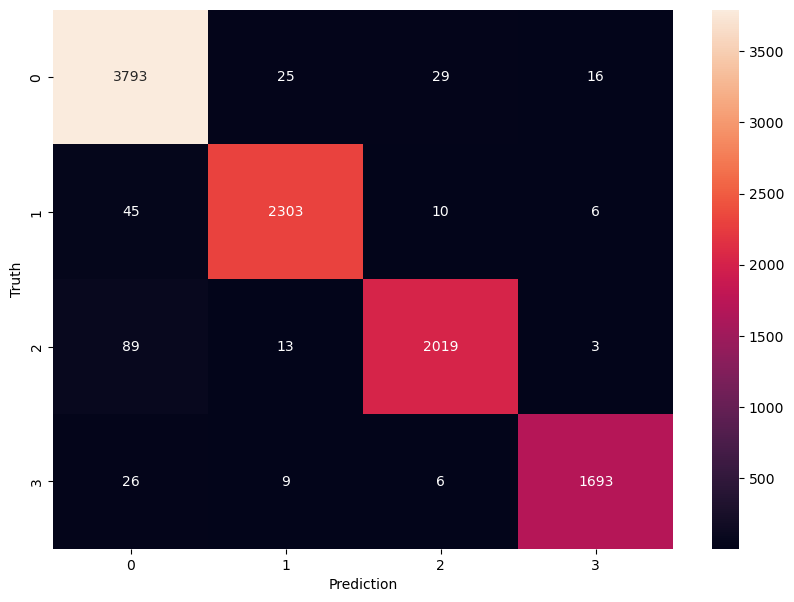

In [97]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')